# 🔎 Exploratory Data Analysis (EDA)

## 📝 Introducción

El Análisis Exploratorio de Datos (EDA) es un paso fundamental en cualquier proyecto de ciencia de datos, ya que nos permite comprender mejor la estructura, las relaciones y los patrones presentes en los datos antes de realizar cualquier modelado o análisis avanzado.

En este proyecto, trabajaremos con dos conjuntos de datos principales:

1. **💓 Cardio Train Dataset**: Este conjunto de datos contiene información sobre diferentes indicadores de salud de personas, como edad, género, altura, peso, presión arterial, colesterol, entre otros. El objetivo es explorar estos datos para identificar posibles correlaciones y patrones que puedan ser útiles para predecir enfermedades cardiovasculares.

2. **🕊️ Cause of Deaths Dataset**: Este conjunto de datos proporciona información sobre las principales causas de muerte a nivel global, desglosadas por país y año. Exploraremos este dataset para entender la distribución de las causas de muerte en diferentes regiones y períodos de tiempo, así como identificar cualquier tendencia o anomalía significativa.

### 🎯 Objetivos del EDA

- **📊 Entender la Distribución de Datos**: Analizar la distribución de las variables individuales para identificar valores atípicos, faltantes, y entender la naturaleza de los datos.
- **🔗 Explorar Relaciones entre Variables**: Investigar posibles correlaciones entre diferentes variables que podrían ser útiles para modelado posterior.
- **🔍 Identificar Patrones y Tendencias**: Buscar patrones y tendencias en los datos que podrían revelar información relevante para los objetivos del proyecto.
- **🛠️ Preparación de Datos**: Realizar las transformaciones necesarias para limpiar y preparar los datos para el análisis y modelado.

### 🛠️ Metodología

1. 📥 **Carga de Datos**: Importar y cargar los datasets en un entorno de análisis.
2. 📊 **Resumen Estadístico**: Obtener un resumen estadístico básico de las variables en los datasets.
3. 📈 **Visualización de Datos**: Utilizar gráficos para visualizar la distribución de las variables y las relaciones entre ellas.
4. 🔍 **Detección de Valores Atípicos y Datos Faltantes**: Identificar y manejar valores atípicos y datos faltantes que puedan afectar el análisis.
5. 🔗 **Análisis de Correlaciones**: Examinar las correlaciones entre variables para identificar posibles relaciones que podrían ser útiles en modelos predictivos.


## 📥 Carga de datos


In [1]:
import sys
import os
from dotenv import load_dotenv

load_dotenv()
work_dir = os.getenv('WORK_DIR')


sys.path.append(work_dir)

In [2]:
from src.model.models import CardioTrain
from src.database.dbconnection import getconnection


In [3]:
from sqlalchemy.orm import sessionmaker, declarative_base, aliased
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
engine = getconnection()
Session = sessionmaker(bind=engine)
session = Session()

Conected successfully to database proyecto!


In [26]:
table = aliased(CardioTrain)
query = session.query(table).statement
df = pd.read_sql(query, engine, index_col=None)

## 📊 Resumen Estadístico


In [27]:
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


## 📈 Visualización de Datos


## 🔍 Detección de Valores Atípicos y Datos Faltantes


In [28]:
numerical = df.loc[:, ['age', 'height', 'weight', 'ap_hi', 'ap_lo']]
def remove_outliers(df):

    for column in numerical.columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        df = df[(df[column] >= (Q1 - 1.25* IQR)) & (df[column] <= (Q3 + 1.25 * IQR))]
    
    return df

df = remove_outliers(df)

## 🔗 Análisis de Correlaciones

Se ha generado un gráfico de correlación, que nos permite ver la relación entre nuestras variables. 

Algunos de los hallazgos fueron:

- ***ap_hi (presión sistólica)*** y ***ap_lo (presión diastólica)*** tienen correlación positiva significativa (0.70) entre estas dos variables, lo cual es esperable, ya que ambas son medidas de la presión arterial y suelen estar relacionadas.
- ***gender*** y ***height*** tienen una correlación de 0.51, lo que indica que hay una relación clara entre el género y la altura. Esto es consistente con lo que se observa en muchas poblaciones, donde, en promedio, los hombres tienden a ser más altos que las mujeres.
- ***ap_hi*** y ***cardio:*** tienen correlación de 0.43, lo que indica una relación moderada, sugiriendo que a mayor presión sistólica, mayor probabilidad de padecer una enfermedad cardiovascular.
- ***ap_lo*** y ***cardio:*** también tiene una correlación positiva de 0.33.
- ***smoke*** y ***gender:*** Existe una correlación de 0.34, lo cual indica que el género tiene una cierta influencia en los hábitos de fumar, lo cual podría ser relevante en análisis más detallados.
- ***weight*** y ***height*** tienen una correlación moderada (0.29) entre el peso y la altura, lo cual también es lógico ya que personas más altas tienden a pesar más.
- ***age*** y ***cardio:*** Existe una correlación positiva (0.24), lo cual sugiere que la edad también está ligeramente relacionada con la presencia de enfermedades cardiovasculares.
- ***cholesterol*** y ***cardio:*** tienen correlación de 0.22, indicando que un mayor nivel de colesterol también podría afectar ligeramente estar relacionado con un mayor riesgo de enfermedades cardiovasculares.

Los demás pares de variables presentan correlaciones más débiles, lo que sugiere que su relación es menos significativa en este contexto. Por ejemplo, aunque algunas variables como el peso tienen cierta correlación con la presencia de enfermedades cardiovasculares (0.18), su impacto es menos pronunciado. Aquellas correlaciones cercanas a 0 indican que no existe una relación lineal fuerte entre las variables, lo que podría implicar que su influencia en el desarrollo de enfermedades cardiovasculares es mínima o nula en este conjunto de datos.


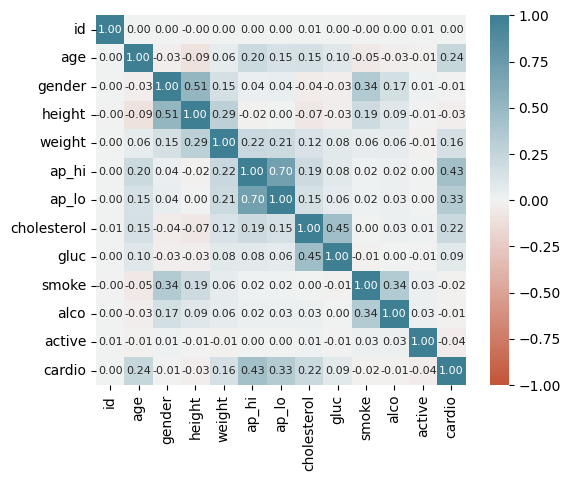

In [29]:
correlation = df.corr()
ax = sns.heatmap(
    correlation,
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True,
    annot=True,
    fmt='.2f',
    annot_kws={"size": 8}
)

## Data distribution

In [30]:
def stadistic_count(num):

    stadistic = num.describe().T
    stadistic['median'] = num.median()
    stadistic['skewness'] = num.skew()
    stadistic['kurtosis'] = num.kurtosis()
    stadistic = stadistic.iloc[:,[0,1,8,2,3,4,5,6,7,9,10]]
    return(stadistic)

In [31]:
stadistic_count(df.loc[:,['age','height','weight','ap_hi','ap_lo']])


,count,mean,median,std,min,25%,50%,75%,max,skewness,kurtosis
age,60283.0,19489.263557,19714.0,2454.752159,14282.0,17721.5,19714.0,21334.5,23713.0,-0.313313,-0.813528
height,60283.0,164.352023,165.0,7.257261,146.0,159.0,165.0,169.0,183.0,0.033411,-0.409718
weight,60283.0,72.819791,71.0,11.697636,44.0,65.0,71.0,80.0,103.0,0.338213,-0.349082
ap_hi,60283.0,126.094952,120.0,13.638322,95.0,120.0,120.0,140.0,165.0,0.693309,0.023296
ap_lo,60283.0,81.615513,80.0,7.540814,68.0,80.0,80.0,90.0,102.0,0.453239,0.095698


la edad parece tener un sesgo hacia la derecha, lo cual significa que tiene una cola hacia la derecha en el histograma, por lo que significa que en este dataset hay varias personas con una mayor edad.

height parece tener casi una distribucion normal con una excepcion de que tambien tiene una cola que tira hacia la derecha, lo cual significa que el valor maximo de 2.5 metros es un outliner que debe de ser estudiado

weight tambien parece ser una distribucion similar a la normal pero con un sesgo o cola hacia la izquierda probablemente van a haber valores outliers muy pequeños, por ejemplo el valor minimo de 10kg, lo cual es un peso demasiado pequeño y debe de ser estudiado, tal vez podria ser un dato erroneo por lo poco posible que es.

ap_hi tiene un valor minimo negativo, esto es un dato imposible lo cual significa dato erroneo, debe ser eliminado posteriormente,por esta razon tambien se ve un sesgo hacia la izquierda por lo cual tendremos que comprobar posteriormente cual sera su forma de distribuirse, ademas de tener un dato maximo demasiado extraño y poco posible, debe ser eliminado posteriormente para proximos analisis.

ap_lo igualmente que el ap_hi tiene un valor negativo probablemente erroneo ademas que por esto tiene lo que parece un sesgo muy fuerte hacia la izquierda y tambien tiene un valor maximo erroneo el cual debe de ser eliminado para posteriores analisis.

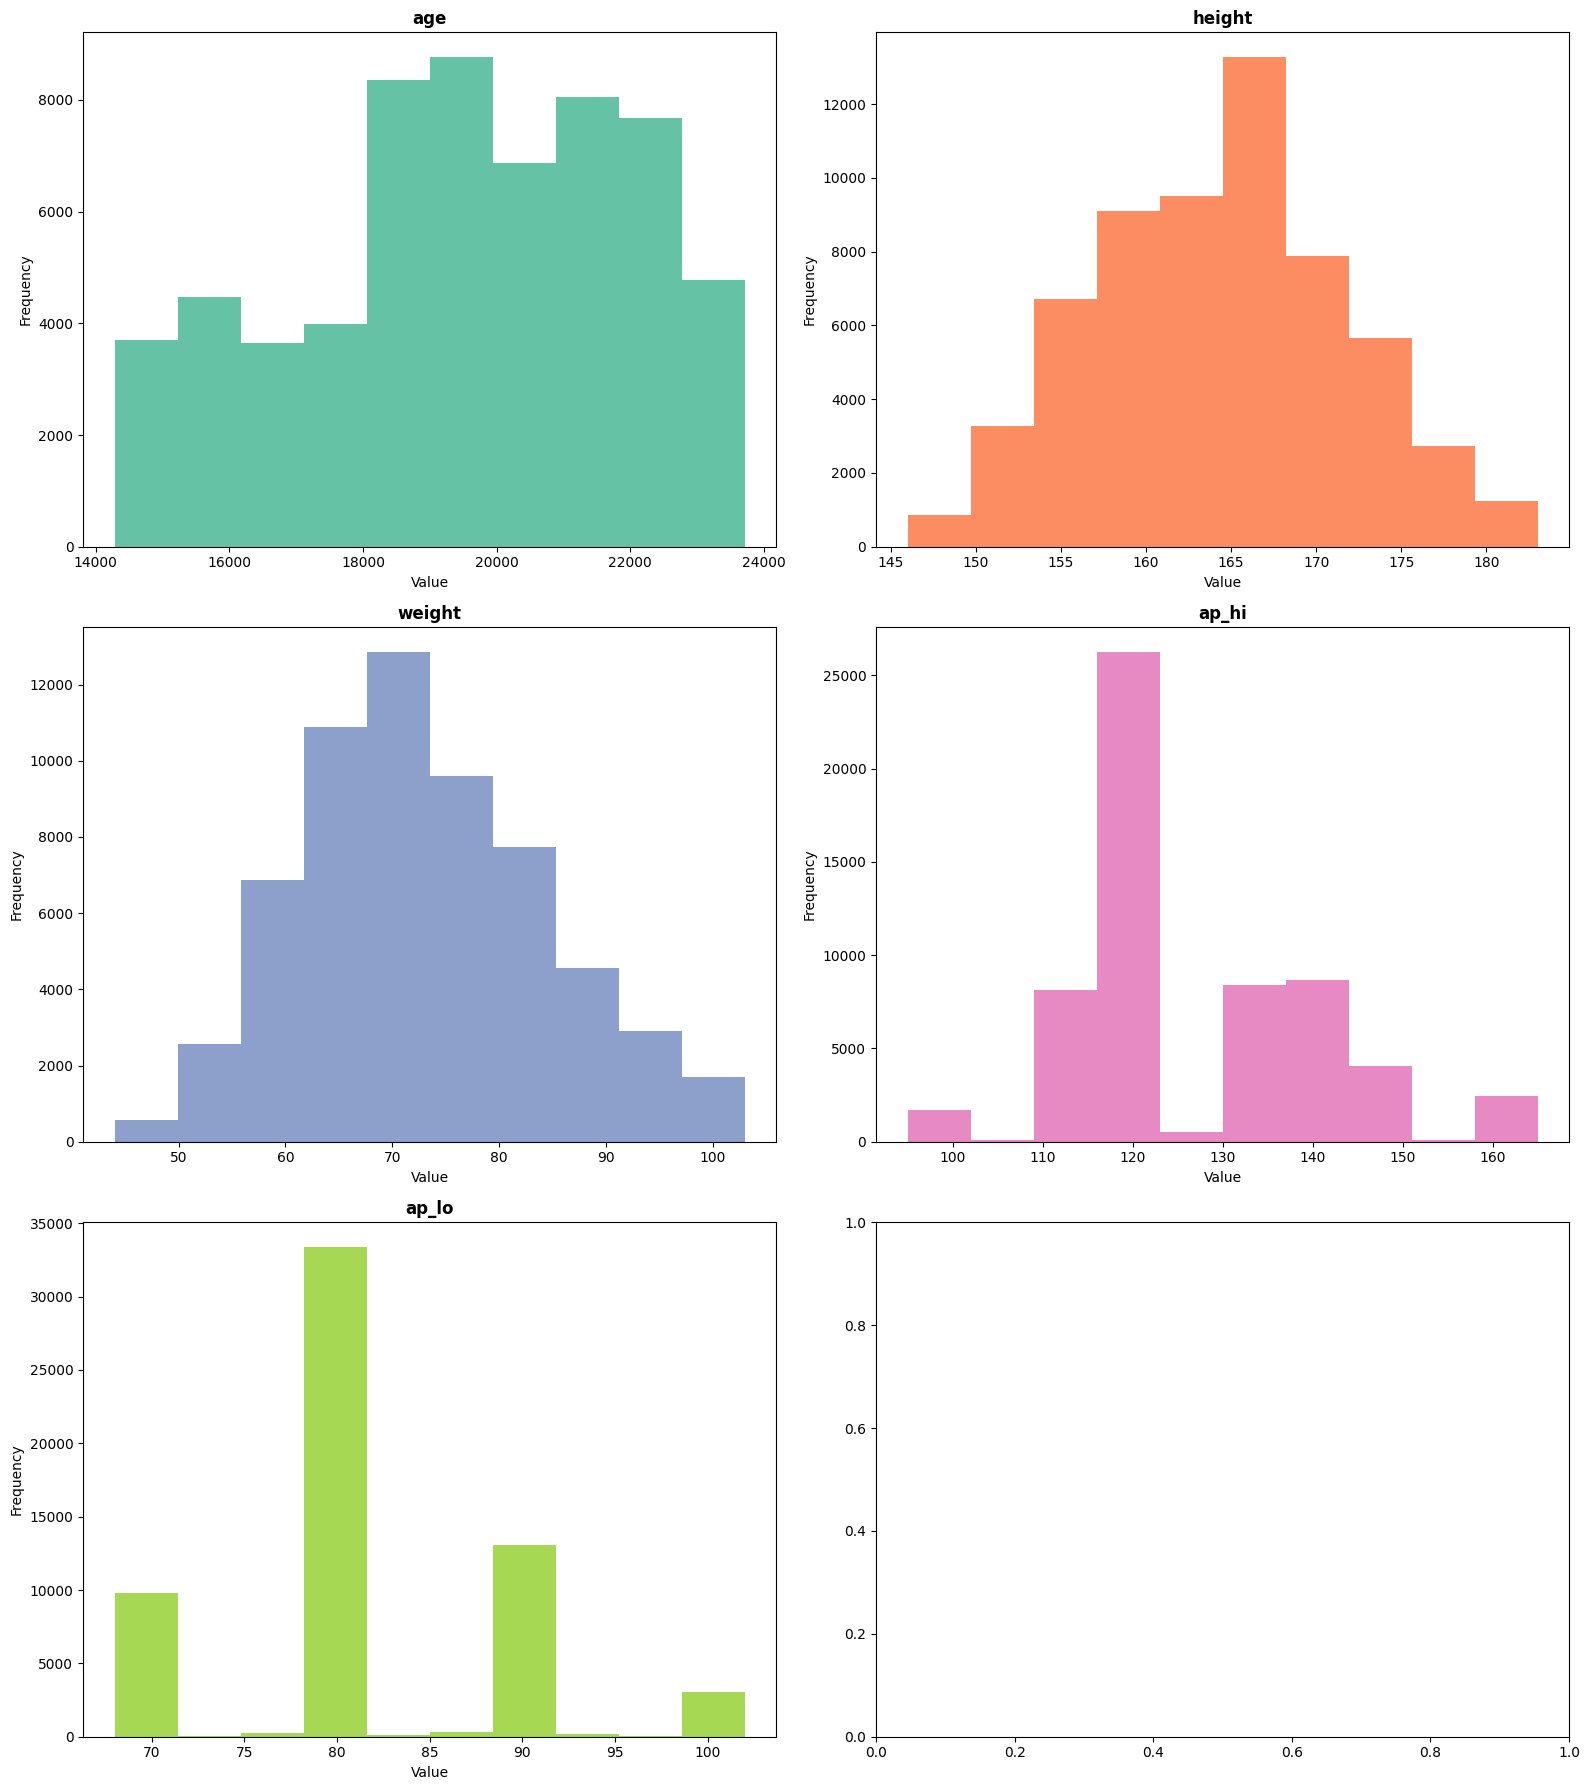

In [32]:
import matplotlib.pyplot as plt
from math import ceil


rows = ceil(numerical.shape[1] / 2)

# Crear los subplots
f, ax = plt.subplots(nrows=rows, ncols=2, figsize=(16, rows * 6))

# Aplanar el array de ejes para facilitar el acceso
ax = ax.flat

# Definir una paleta de colores
colors = plt.get_cmap('Set2').colors

# Crear histogramas para cada columna
for i, column in enumerate(numerical.columns):
    df[column].plot.hist(ax=ax[i], color=colors[i % len(colors)])
    ax[i].set_title(column, fontsize=12, fontweight="bold")
    ax[i].set_xlabel('Value')
    ax[i].set_ylabel('Frequency')

# Ajustar el diseño
plt.tight_layout()
plt.show()


Ademas del analisis anterioemente con los histogramas podemos ver la frecuencia que siguen las variables numericas donde la mayoria parece tener una sola moda, a excepcion de la variable edad que parece estar totalmente sesgada hacia la derecha, lo cual significa que hay mucha mas cantidad de personas con mayor edad en este estudio que los que tiene menor edad, ademas como se esperaba de los demas datos siguen una distribucion similar a una normal.

## Patterns

In [33]:
df['cardio'].value_counts(normalize = True) * 100

cardio
0    50.997794
1    49.002206
Name: proportion, dtype: float64

hay casi igual de cantidad de personas que estan enfermas cardiovascularmente como las que no, esto es bueno para hacer un buen modelo ya que no tendra problemas de sesgo.

<Axes: xlabel='cholesterol'>

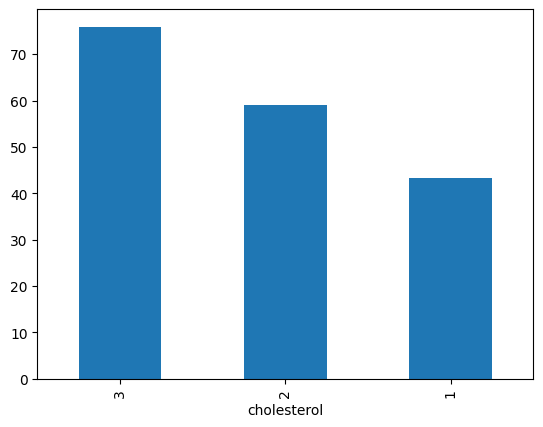

In [34]:
temp = df.groupby('cholesterol').cardio.mean().sort_values(ascending = False)*100
temp.plot.bar()

<Axes: xlabel='gluc'>

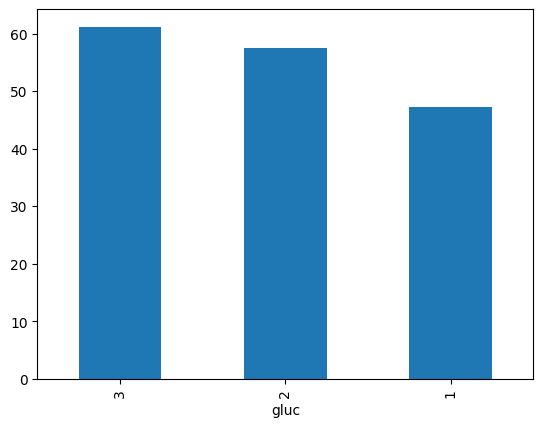

In [51]:
temp = df.groupby('gluc').cardio.mean().sort_values(ascending = False)*100
temp.plot.bar()

<Axes: xlabel='gender'>

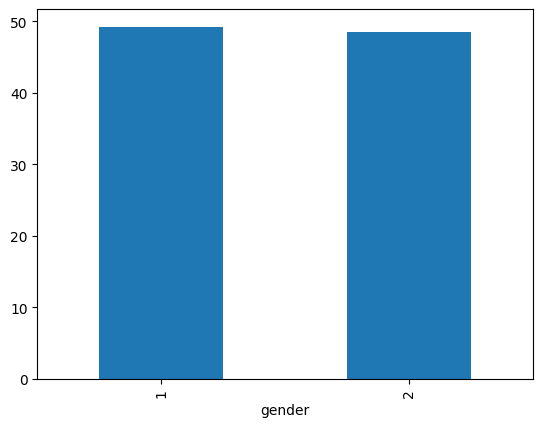

In [52]:
temp = df.groupby('gender').cardio.mean().sort_values(ascending = False)*100
temp.plot.bar()

<Axes: xlabel='smoke'>

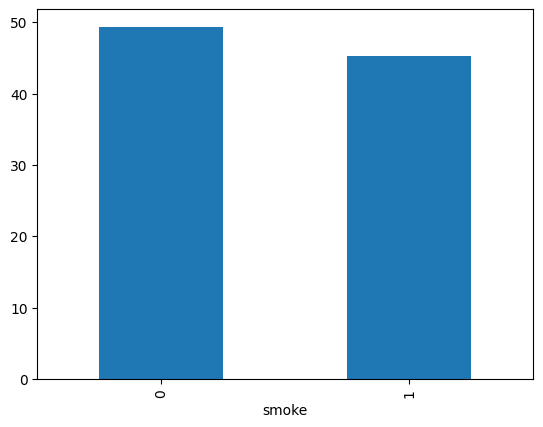

In [53]:
temp = df.groupby('smoke').cardio.mean().sort_values(ascending = False)*100
temp.plot.bar()

<Axes: xlabel='alco'>

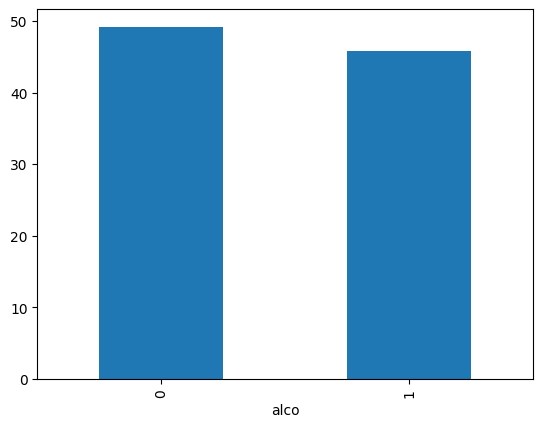

In [54]:
temp = df.groupby('alco').cardio.mean().sort_values(ascending = False)*100
temp.plot.bar()

<Axes: xlabel='active'>

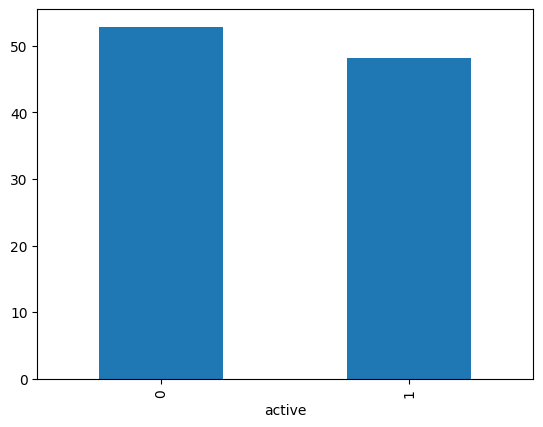

In [55]:
temp = df.groupby('active').cardio.mean().sort_values(ascending = False)*100
temp.plot.bar()

hay un patron en la gente que tiene enfermedades cardivasculares, cosas que pueden afectar mas que otras por ejemplo las siguientes:

tener un alto nivel de colesterol te hace ser mas propenso a tener enfermedades cardiovasculares, con un 75%

tambien tener un alto nivel de glucosa, alrededor del 60% de la gente que tiene la glucosa alta tiene enfermedades cardiovasculares.

no hay mucha diferencia en tener enfermedades cardiovasculares entre hombres y mujeres aunque hay una ligera diferencia por parte de mujeres, es decir las mujeres tienen un leve aumento en la probabilidad de tener la enfermedad

no hay mucha diferencia para la gente que fuma y bebe tienen una pequeña mayor diferencia de poder tener enfermedades cardiovasculares vs los que no

y finalmente lo mas importante para nuestro estudio parece ser que, las personas que son mas activas tienen una mucha menor probabilidad de contener enfermedades cardiovasculares

# Data Visualization

Se ha hecho un heatmat entre el peso y la altura, en el cual se identifica el porcentaje de personas que sufren de enfermedades cardiovasculares según estas dos variables.

Algunos de los hallazgos encontrados son:

- Las personas en un rango de altura de ***145-150 cm*** y con peso entre ***90-95 kg*** son las que más sufren de enfermedades cardiovasculares.
- Las personas que miden entre ***160-175 cm*** con un peso de ***40-45 kg***, junto con las personas que miden entre ***180-185 cm*** y pesan ***50-55 kg*** son las que menos sufren de enfermedades cardiovasculares.
- Entre ,ás baja sea la estatura y mayor sea el peso, es más las probabilidades de sufrir enfermedades cardiovasculares.

C:\Users\carol\AppData\Local\Temp\ipykernel_12284\2886038008.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  cardio_counts= weight_height_df.groupby(['height_bin', 'weight_bin'])['cardio'].mean() * 100


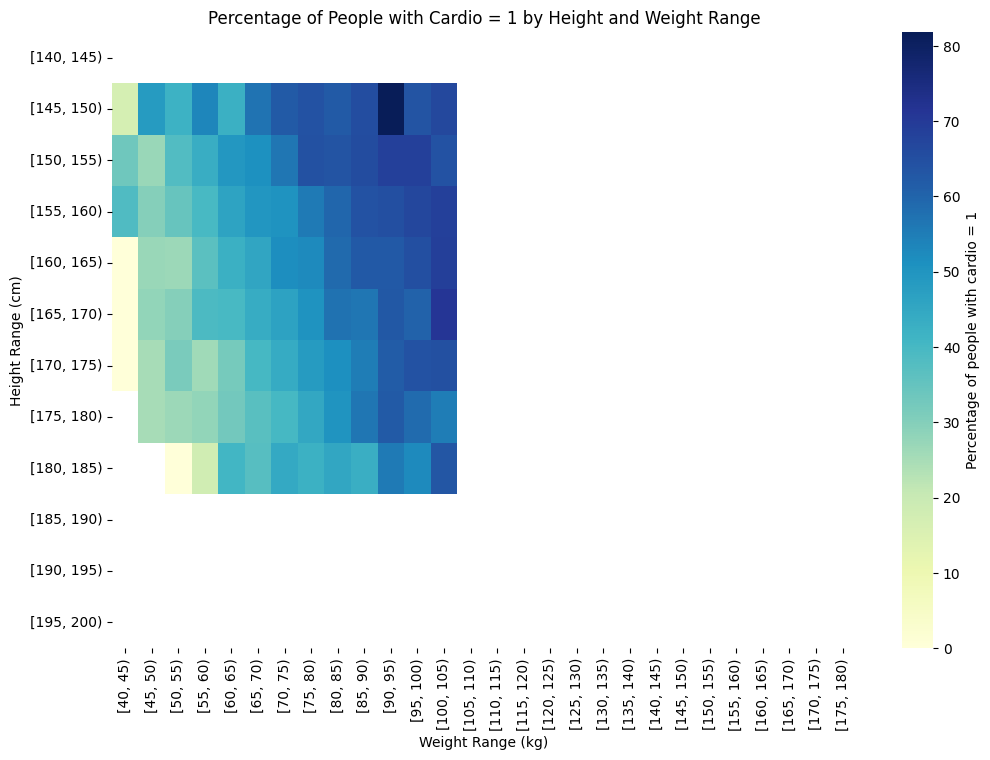

In [41]:
weight_height_df = df.copy()

height_bins = range(140, 201, 5) 
weight_bins = range(40, 181, 5)   

weight_height_df['height_bin'] = pd.cut(weight_height_df['height'], bins=height_bins, right=False)
weight_height_df['weight_bin'] = pd.cut(weight_height_df['weight'], bins=weight_bins, right=False)
cardio_counts= weight_height_df.groupby(['height_bin', 'weight_bin'])['cardio'].mean() * 100
heatmap_data = cardio_counts.unstack()

plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, cmap='YlGnBu', fmt=".1f", cbar_kws={'label': 'Percentage of people with cardio = 1'})
plt.title('Percentage of People with Cardio = 1 by Height and Weight Range')
plt.xlabel('Weight Range (kg)')
plt.ylabel('Height Range (cm)')
plt.show()

Se ha realizado un análisis de la condición cardiovascular de las personas de acuerdo a su ***colesterol***.

De las personas con nivel de colesterol normal, el 43.3% sufren de enfermedades cardiovasculares. Además, mientras más alto sea el colesterol de lo normal, estas probabilidades aumentan, viendose que de las personas con niveles muy arriba de lo normal, el 75.9% sufren de estas enfermedades. 

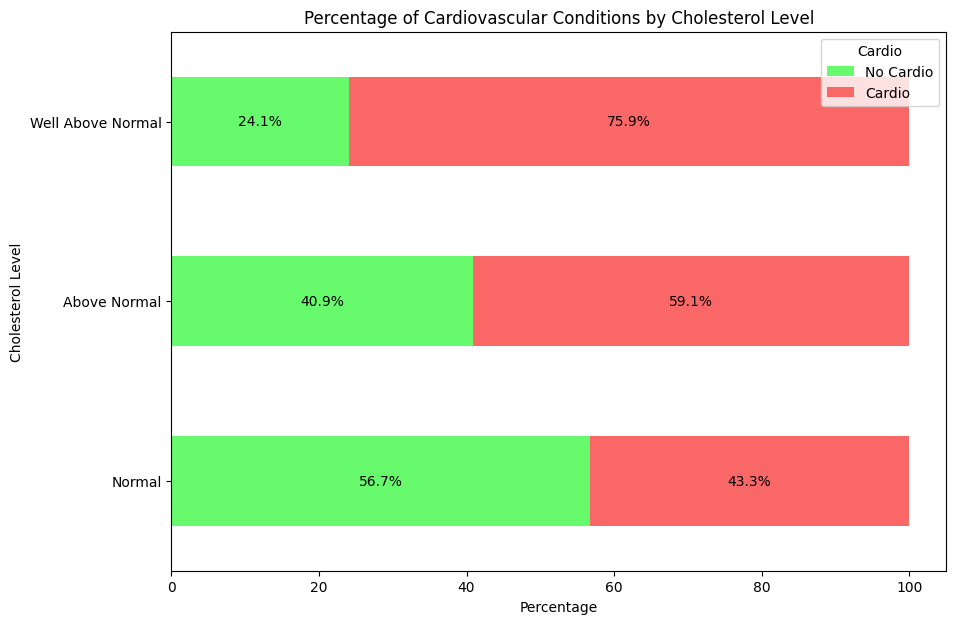

In [36]:
cholesterol_counts = df.groupby(['cholesterol', 'cardio']).size().reset_index(name='count')
total_counts = cholesterol_counts.groupby('cholesterol')['count'].sum().reset_index(name='total')
cholesterol_counts = cholesterol_counts.merge(total_counts, on='cholesterol')
cholesterol_counts['percentage'] = (cholesterol_counts['count'] / cholesterol_counts['total']) * 100

pivot_df = cholesterol_counts.pivot(index='cholesterol', columns='cardio', values='percentage')

colors = {0: '#67fa6c', 1: '#fa6767'}
ax = pivot_df.plot(kind='barh', stacked=True, figsize=(10, 7), color=[colors[col] for col in pivot_df.columns])

ax.set_ylabel('Cholesterol Level')
ax.set_xlabel('Percentage')
ax.set_title('Percentage of Cardiovascular Conditions by Cholesterol Level')
ax.legend(title='Cardio', labels=['No Cardio', 'Cardio'])

for i, (index, row) in enumerate(pivot_df.iterrows()):
    total_width = row.sum()
    start = 0
    for col in pivot_df.columns:
        if row[col] > 0:
            ax.text(start + row[col] / 2, i, f'{row[col]:.1f}%', 
                    ha='center', va='center', color='black', fontsize=10)
        start += row[col]

plt.yticks(ticks=range(len(pivot_df.index)), labels=['Normal', 'Above Normal', 'Well Above Normal'], rotation=0)
plt.show()

También se ha realizado un análisis de la condición cardiovascular de las personas de acuerdo a su ***glucosa***.

Similar con lo del colesterol, de las personas con nivel de glucosa normal, el 48.1% sufren de enfermedades cardiovasculares. Mientras más alto sea el nivel de glucosa de lo normal, estas probabilidades aumentan, viendose que de las personas con niveles muy arriba de lo normal, el 62.2% sufren de estas enfermedades, algo menos que en el caso del colesterol. 

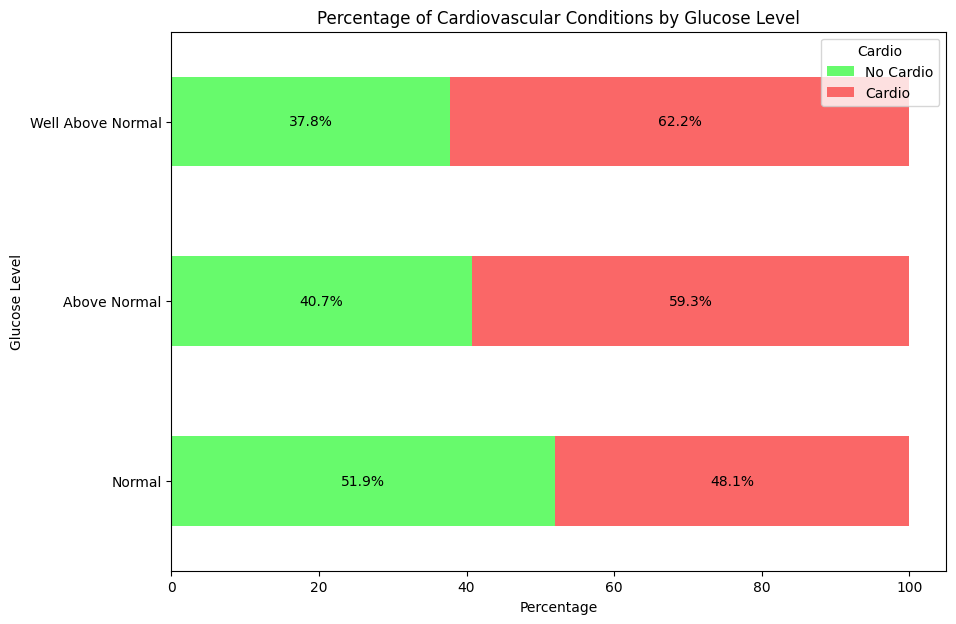

In [20]:
glucose_counts = df.groupby(['gluc', 'cardio']).size().reset_index(name='count')
total_counts = glucose_counts.groupby('gluc')['count'].sum().reset_index(name='total')
glucose_counts = glucose_counts.merge(total_counts, on='gluc')
glucose_counts['percentage'] = (glucose_counts['count'] / glucose_counts['total']) * 100

pivot_df = glucose_counts.pivot(index='gluc', columns='cardio', values='percentage')


colors = {0: '#67fa6c', 1: '#fa6767'}

ax = pivot_df.plot(kind='barh', stacked=True, figsize=(10, 7), color=[colors[col] for col in pivot_df.columns])

ax.set_ylabel('Glucose Level')
ax.set_xlabel('Percentage')
ax.set_title('Percentage of Cardiovascular Conditions by Glucose Level')
ax.legend(title='Cardio', labels=['No Cardio', 'Cardio'])

for i, (index, row) in enumerate(pivot_df.iterrows()):
    total_width = row.sum()
    start = 0
    for col in pivot_df.columns:
        if row[col] > 0:
            ax.text(start + row[col] / 2, i, f'{row[col]:.1f}%', 
                    ha='center', va='center', color='black', fontsize=10)
        start += row[col]

plt.yticks(ticks=range(len(pivot_df.index)), labels=['Normal', 'Above Normal', 'Well Above Normal'], rotation=0)
plt.show()

Se creó una nueva columna llamada ***blood_pressure*** en el DataFrame para clasificar los niveles de presión arterial de los individuos según las mediciones de presión sanguinea sistólica (ap_hi) y diastólica (ap_lo). Esto se hace con el objetivo de hacer análisis en conjunto de estas dos variables.

***Blood pressure:***
- **1:** Normal
- **2:** Elevada
- **3:** Alta presión sanguinea etapa 1
- **4:** Alta presión sanguinea etapa 2
- **5:** Crisis hipertensiva 

In [45]:
def classify_blood_pressure(row):
    if row['ap_hi'] < 120 and row['ap_lo'] < 80:
        return 1  # NORMAL
    elif 120 <= row['ap_hi'] <= 129 and row['ap_lo'] < 80:
        return 2  # ELEVATED
    elif (130 <= row['ap_hi'] <= 139) or (80 <= row['ap_lo'] <= 89):
        return 3  # HIGH BLOOD PRESSURE STAGE 1
    elif (140 <= row['ap_hi'] <= 180) or ( 90 <= row['ap_lo'] <= 120):
        return 4  # HIGH BLOOD PRESSURE STAGE 2
    elif row['ap_hi'] > 180 or row['ap_lo'] > 120:
        return 5  # HYPERTENSIVE CRISIS
    else:
        return None

df['blood_pressure'] = df.apply(classify_blood_pressure, axis=1)

print(df['blood_pressure'].value_counts())

df

blood_pressure
3    37579
4    13295
1     6880
2     2529
Name: count, dtype: int64


,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,blood_pressure
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,3
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,4
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,3
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1,4
5,8,21914,1,151,67.0,120,80,2,2,0,0,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69993,99991,19699,1,172,70.0,130,90,1,1,0,0,1,1,3
69994,99992,21074,1,165,80.0,150,80,1,1,0,0,1,1,3
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0,3
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1,3


En los pie charts están los porcentajes de las personas que sufren de enfermedades cardiovasculares. 

Mientras más alta sea la presión sanguinea, es más la probabilidad de enfermedad cardiovascular. Viendose que de las personas con presión sanguinea normal, el 22.9% sufren de enfermedades cardiovasculares. Por otro lado, las personas con alta presión sanguinea etapa 2 tienen 79.3% de probabilidad de sufrir estas enfermedades.

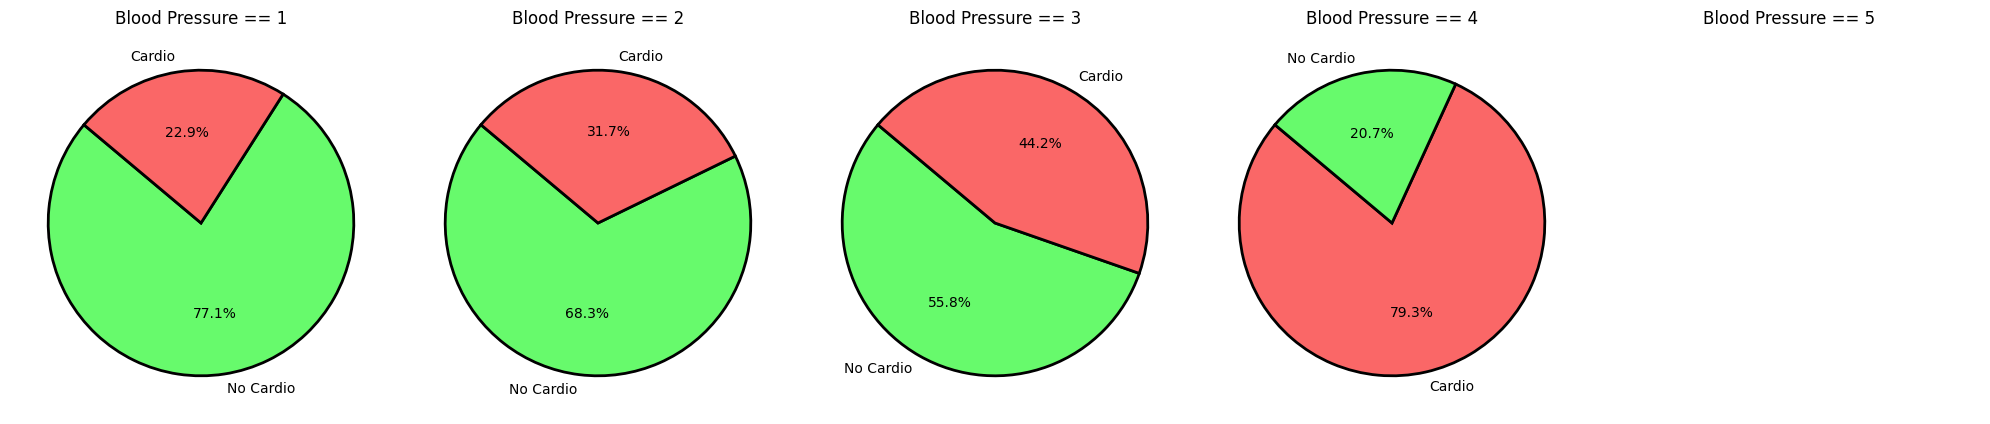

In [47]:
ordered_categories = [1, 2, 3, 4, 5]
label_mapping = {0: 'No Cardio', 1: 'Cardio'}

fig, axes = plt.subplots(nrows=1, ncols=len(ordered_categories), figsize=(20, 6))

for i, bp in enumerate(ordered_categories):
    df_filtered = df[df['blood_pressure'] == bp]
    cardio_counts = df_filtered['cardio'].value_counts()

    colors = ['#67fa6c' if x == 0 else '#fa6767' for x in cardio_counts.index]
    wedgeprops = {'edgecolor': 'black', 'linewidth': 2}
    labels = [label_mapping.get(x, x) for x in cardio_counts.index]

    axes[i].pie(cardio_counts, labels=labels, autopct='%1.1f%%', startangle=140, colors=colors, wedgeprops=wedgeprops)
    axes[i].set_title(f'Blood Pressure == {bp}')

plt.tight_layout()
plt.show()

Se han hecho graficos del porcentaje de personas con enfermedades cardiovasculares de acuerdo a su presión sanguinea y si son activos, fuman o toman alcohol. A simple vista, parecen tener el mismo comportamiento. Ser inactivo, no tomar alcohol y no fumar, aunque parece extraño, tienen una probabilidad algo mayor a diferencia de sus opuestos. Esto pasa a ser poco relevante en niveles de hipertensión etapa 2, donde el riesgo es alto independientemente de la actividad, fumar y tomar alcohol. 

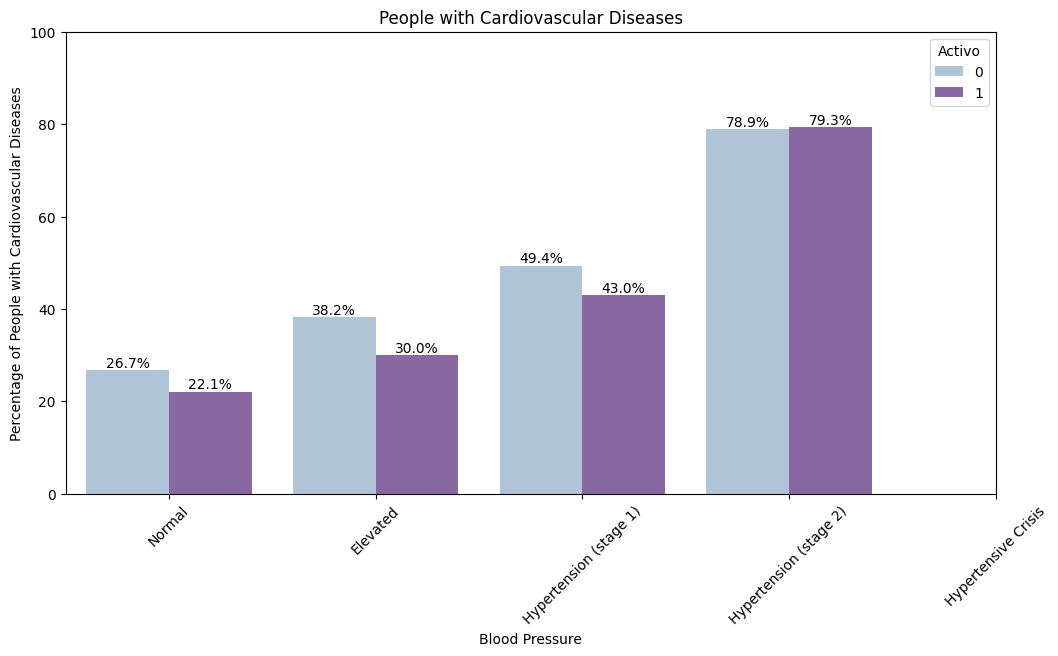

In [59]:
total_counts = df.groupby(['blood_pressure', 'active']).size().reset_index(name='count')
cardio_counts = df[df['cardio'] == 1].groupby(['blood_pressure', 'active']).size().reset_index(name='cardio_count')
merged_df = pd.merge(total_counts, cardio_counts, on=['blood_pressure', 'active'], how='left').fillna(0)
merged_df['percentage'] = (merged_df['cardio_count'] / merged_df['count']) * 100

plt.figure(figsize=(12, 6))
bar_plot = sns.barplot(data=merged_df, x='blood_pressure', y='percentage', hue='active', palette='BuPu')

for p in bar_plot.patches:
    height = p.get_height()
    if height > 0.1:
        bar_plot.annotate(f'{height:.1f}%',
                          (p.get_x() + p.get_width() / 2., height),
                          ha='center', va='center',
                          xytext=(0, 5),
                          textcoords='offset points')

plt.title('People with Cardiovascular Diseases')
plt.xlabel('Blood Pressure')
plt.ylabel('Percentage of People with Cardiovascular Diseases')
plt.ylim(0, 100)
plt.legend(title='Activo')

labels = {
    0: 'Normal',
    1: 'Elevated',
    2: 'Hypertension (stage 1)',
    3: 'Hypertension (stage 2)',
    4: 'Hypertensive Crisis'
}

plt.xticks(ticks=list(labels.keys()), labels=list(labels.values()), rotation=45)

plt.show()

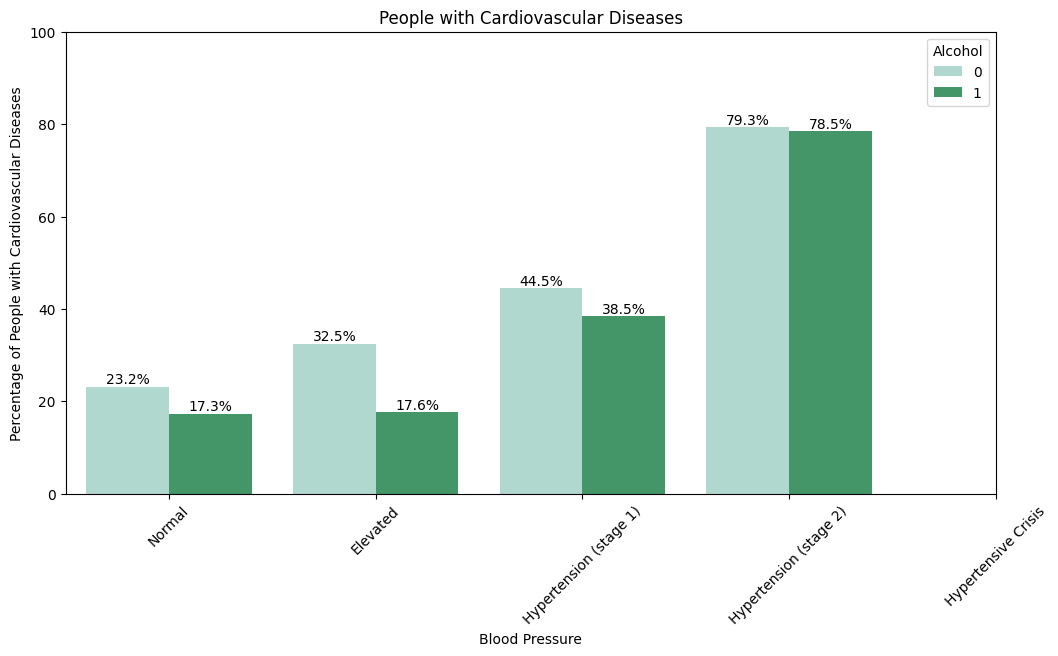

In [60]:
total_counts = df.groupby(['blood_pressure', 'alco']).size().reset_index(name='count')
cardio_counts = df[df['cardio'] == 1].groupby(['blood_pressure', 'alco']).size().reset_index(name='cardio_count')
merged_df = pd.merge(total_counts, cardio_counts, on=['blood_pressure', 'alco'], how='left').fillna(0)
merged_df['percentage'] = (merged_df['cardio_count'] / merged_df['count']) * 100

plt.figure(figsize=(12, 6))
bar_plot = sns.barplot(data=merged_df, x='blood_pressure', y='percentage', hue='alco', palette='BuGn')

for p in bar_plot.patches:
    height = p.get_height()
    if height > 0.1:
        bar_plot.annotate(f'{height:.1f}%',
                          (p.get_x() + p.get_width() / 2., height),
                          ha='center', va='center',
                          xytext=(0, 5),
                          textcoords='offset points')

plt.title('People with Cardiovascular Diseases')
plt.xlabel('Blood Pressure')
plt.ylabel('Percentage of People with Cardiovascular Diseases')
plt.ylim(0, 100)
plt.legend(title='Alcohol')

labels = {
    0: 'Normal',
    1: 'Elevated',
    2: 'Hypertension (stage 1)',
    3: 'Hypertension (stage 2)',
    4: 'Hypertensive Crisis'
}

plt.xticks(ticks=list(labels.keys()), labels=list(labels.values()), rotation=45)

plt.show()

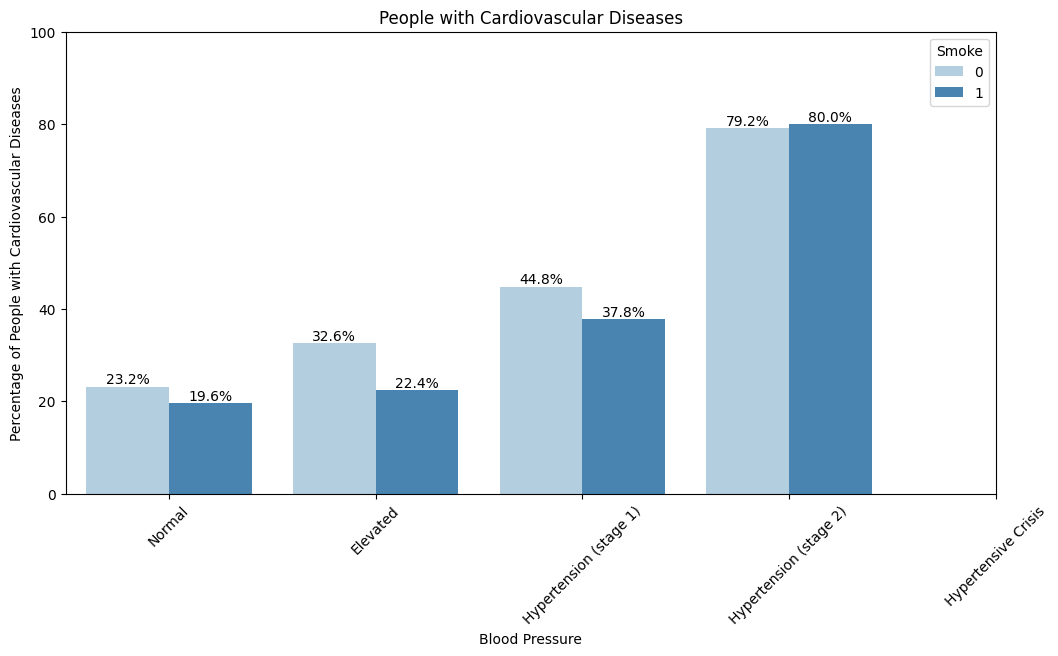

In [61]:
total_counts = df.groupby(['blood_pressure', 'smoke']).size().reset_index(name='count')
cardio_counts = df[df['cardio'] == 1].groupby(['blood_pressure', 'smoke']).size().reset_index(name='cardio_count')
merged_df = pd.merge(total_counts, cardio_counts, on=['blood_pressure', 'smoke'], how='left').fillna(0)
merged_df['percentage'] = (merged_df['cardio_count'] / merged_df['count']) * 100

plt.figure(figsize=(12, 6))
bar_plot = sns.barplot(data=merged_df, x='blood_pressure', y='percentage', hue='smoke', palette='Blues')

for p in bar_plot.patches:
    height = p.get_height()
    if height > 0.1:
        bar_plot.annotate(f'{height:.1f}%',
                          (p.get_x() + p.get_width() / 2., height),
                          ha='center', va='center',
                          xytext=(0, 5),
                          textcoords='offset points')

plt.title('People with Cardiovascular Diseases')
plt.xlabel('Blood Pressure')
plt.ylabel('Percentage of People with Cardiovascular Diseases')
plt.ylim(0, 100)
plt.legend(title='Smoke')

labels = {
    0: 'Normal',
    1: 'Elevated',
    2: 'Hypertension (stage 1)',
    3: 'Hypertension (stage 2)',
    4: 'Hypertensive Crisis'
}

plt.xticks(ticks=list(labels.keys()), labels=list(labels.values()), rotation=45)

plt.show()